<a href="https://colab.research.google.com/github/Pranu008/Big-Data-analytics-and-Machine-learning/blob/Chaitra-CP/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl

# Dummy data just for testing
np.random.seed(0)
X = np.random.randn(100, 10)  # 100 samples, 10 features
Y = np.random.randn(100)

In [4]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl

# Dummy data just for testing
np.random.seed(0)
X = np.random.randn(100, 10)  # 100 samples, 10 features
Y = np.random.randn(100)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.48252765499239, tolerance: 0.008296505546771568
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective d

(10, 100)

In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl

# ----------------------------------
# ASSUME X and Y already exist
# ----------------------------------

# 1. Standardize X
Xs = X - X.mean(0)
X_scale = X.std(0)
Xs = Xs / X_scale

# 2. Lambda sequence
lambdas = 10 ** np.linspace(8, -2, 100) / Y.std()

# 3. Compute ElasticNet path
soln_array = skl.ElasticNet.path(
    Xs.values if hasattr(Xs, "values") else Xs,
    Y,
    l1_ratio=0.0,
    alphas=lambdas
)[1]

# 4. Column names
if hasattr(X, "columns"):
    col_names = X.columns
else:
    col_names = [f"x{i}" for i in range(soln_array.shape[1])]

# 5. Create DataFrame
soln_path = pd.DataFrame(
    soln_array.T,
    columns=col_names,
    index=-np.log(lambdas)
)

soln_path.index.name = "negative log(lambda)"

soln_path


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.48252765499239, tolerance: 0.008296505546771568
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective d

ValueError: Shape of passed values is (100, 10), indices imply (100, 100)

In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl

# ---------------------------------------------------
# ASSUME X and Y are already defined
# ---------------------------------------------------

# 1. Standardize X
Xs = X - X.mean(0)
X_scale = X.std(0)
Xs = Xs / X_scale

# 2. Lambda sequence
lambdas = 10 ** np.linspace(8, -2, 100) / Y.std()

# 3. ElasticNet path
soln_array = skl.ElasticNet.path(
    Xs.values if hasattr(Xs, "values") else Xs,
    Y,
    l1_ratio=0.0,
    alphas=lambdas           ##this is the modal
)[1]

# 4. Work out correct sizes
n_features = soln_array.shape[0]   # number of coefficients per lambda
n_lambdas  = soln_array.shape[1]   # number of lambda values

print("soln_array shape:", soln_array.shape)  # just to check

# Column names: MUST be length n_features
if hasattr(X, "columns") and len(X.columns) == n_features:
    col_names = X.columns
else:
    col_names = [f"x{i}" for i in range(n_features)]

# Index: MUST be length n_lambdas (100 here)
index_vals = -np.log(lambdas)

# 5. Create DataFrame
soln_path = pd.DataFrame(
    soln_array.T,     # shape (n_lambdas, n_features)
    columns=col_names,
    index=index_vals
)

soln_path.index.name = "negative log(lambda)"

soln_path


soln_array shape: (10, 100)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.48252765499239, tolerance: 0.008296505546771568
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective d

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
negative log(lambda),,,,,,,,,,
-18.514061,3.653237e-10,-2.583550e-10,-3.129116e-10,2.884748e-09,-8.764743e-10,-6.075110e-10,1.327212e-09,-2.257296e-10,9.790938e-10,-1.355962e-09
-18.281477,4.609862e-10,-3.260070e-10,-3.948497e-10,3.640139e-09,-1.105985e-09,-7.665919e-10,1.674751e-09,-2.848385e-10,1.235476e-09,-1.711030e-09
-18.048892,5.816986e-10,-4.113742e-10,-4.982438e-10,4.593335e-09,-1.395595e-09,-9.673293e-10,2.113296e-09,-3.594254e-10,1.558994e-09,-2.159075e-09
-17.816308,7.340204e-10,-5.190954e-10,-6.287123e-10,5.796131e-09,-1.761041e-09,-1.220631e-09,2.666677e-09,-4.535434e-10,1.967227e-09,-2.724444e-09
-17.583724,9.262287e-10,-6.550241e-10,-7.933450e-10,7.313888e-09,-2.222182e-09,-1.540262e-09,3.364965e-09,-5.723068e-10,2.482359e-09,-3.437858e-09
...,...,...,...,...,...,...,...,...,...,...
3.581452,2.897430e-02,-4.041132e-03,-3.025568e-02,2.950540e-01,-1.317430e-01,-8.463190e-02,9.355563e-02,7.844875e-03,8.854236e-02,-9.804360e-02
3.814037,2.903186e-02,-3.842548e-03,-3.041472e-02,2.967822e-01,-1.327339e-01,-8.531437e-02,9.380561e-02,8.027012e-03,8.894481e-02,-9.834940e-02
4.046621,2.907654e-02,-3.680751e-03,-3.054197e-02,2.981674e-01,-1.335299e-01,-8.586341e-02,9.400314e-02,8.173642e-03,8.926592e-02,-9.859215e-02


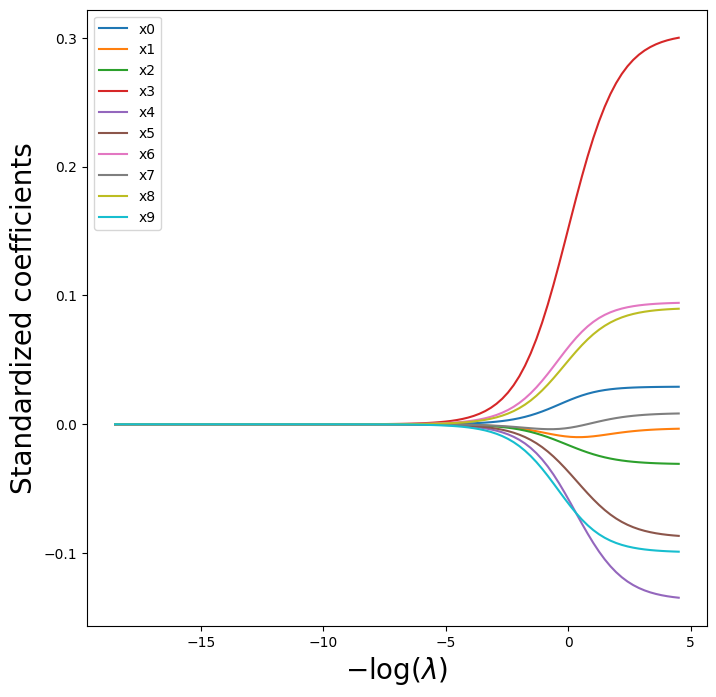

In [9]:
import matplotlib.pyplot as plt

path_fig, ax = plt.subplots(figsize=(8,8))

soln_path.plot(ax=ax, legend=False)

ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left')

plt.show()


In [10]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(np.float64(12622.942709796087),
 x0    0.000003
 x1   -0.000002
 x2   -0.000003
 x3    0.000025
 x4   -0.000008
 x5   -0.000005
 x6    0.000012
 x7   -0.000002
 x8    0.000009
 x9   -0.000012
 Name: -9.443271287185649, dtype: float64)

In [11]:
np.linalg.norm(beta_hat)

np.float64(3.2963638250942016e-05)

In [12]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(np.float64(120.49210482166615), np.float64(0.0034207082147367333))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model as skl

# Ridge via ElasticNet with l1_ratio = 0
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)

scaler = StandardScaler(with_mean=True, with_std=True)

pipe = Pipeline(steps=[
    ('scaler', scaler),
    ('ridge', ridge)
])

pipe.fit(X, Y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.141e+01, tolerance: 8.296e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNet(alpha=np.float64(120.49210482166615), l1_ratio=0))])

In [15]:
np.linalg.norm(ridge.coef_)

np.float64(0.0034207082147367333)